# Evaluación Práctica 1
> **Fecha de entrega:** Domingo 15 de junio de 2025, 22:00
>
> **Nombre estudiante 1:** Miguel Acuña Gaete


---

## Instrucciones Importantes
- Complete todas las secciones marcadas con `# TODO`
- No borre las salidas de las celdas una vez ejecutadas
- Este notebook debe ejecutarse de inicio a fin sin errores
- Incluya comentarios explicativos en su código
- Justifique todas sus decisiones analíticas

## Instalación de Dependencias
**Ejecute esta celda primero para instalar todas las librerías necesarias**

In [1]:
# Instalación de dependencias
!pip install pandas numpy matplotlib seaborn scikit-learn

# Opcional: Puede agregar más dependencias, por ejemplo
# !pip install plotly  # Para gráficos interactivos
# !pip install kaggle  # Si usa la API de Kaggle


## Importación de Librerías

In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import random
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV








In [3]:
# Para reproducibilidad
RNG_SEED = 0

random.seed(RNG_SEED)
np.random.seed(RNG_SEED)

---
# Fase 1: Preparación y Exploración de Datos (3 pts.)

## Pregunta 1: Selección y descarga de dataset [1 pts.]

**Requisitos del dataset:**
- Al menos 10 columnas (incluyendo la variable objetivo)
- Al menos 100 filas
- Columnas numéricas y categóricas
- Una columna que pueda ser usada como variable objetivo

### 1.1 Descripción del Dataset Elegido

**TODO: Complete la información de su dataset**

- **Nombre del dataset:** Taco Sales Dataset (2024–2025)

- **Fuente:** [https://www.kaggle.com/datasets/atharvasoundankar/taco-sales-dataset-20242025](https://www.kaggle.com/datasets/atharvasoundankar/taco-sales-dataset-20242025)

- **Descripción:**  
  Este conjunto de datos contiene 1.000 registros sintéticos de pedidos de tacos a domicilio realizados entre enero de 2024 y mayo de 2025 en varias ciudades de Estados Unidos. Incluye detalles como nombre del restaurante, tipo y tamaño de taco, número de ingredientes, distancia de entrega, hora del pedido, propina, precio total y si fue un pedido de fin de semana.

### 🎯 Tarea de predicción

El objetivo principal es construir un modelo de regresión supervisada capaz de **predecir el precio total de un pedido futuro (`Price ($)`)**, utilizando como entrada las características del pedido: tipo y tamaño del taco, número de toppings, distancia de reparto, duración estimada de entrega, entre otras.

Si bien el precio ya está presente en los datos históricos, el foco del proyecto es **entrenar un modelo que permita estimar el precio promedio esperado de pedidos nuevos**, sin necesidad de conocer una fórmula explícita. Esto resulta útil para:
- automatizar cotizaciones,
- anticipar ingresos promedio por pedido,
- y analizar el impacto de ciertas características en el valor final.

De manera complementaria, también se predice la **propina (`Tip ($)`)**, una variable de naturaleza más incierta, asociada a la experiencia del cliente, el monto total del pedido o la logística. Su predicción es relevante para estimar el ingreso total promedio asociado a un pedido.

---

### 🔎 Tipo de problema:  
**Regresión supervisada** sobre variables continuas.





### 1.2 Descarga Programática del Dataset

In [4]:
# 1. Descargar el archivo desde Google Drive
!gdown 1KIQuWTTjsQzAv95Cn6pLUlmVK2JC8q60 -O taco_sales.csv


# 3. Verificar si el archivo existe antes de cargar
if os.path.exists("taco_sales.csv"):
    print("✅ Archivo encontrado, cargando...")
    df = pd.read_csv("taco_sales.csv")
else:
    print("❌ Archivo no encontrado, verifique el enlace o ID.")


Downloading...
From: https://drive.google.com/uc?id=1KIQuWTTjsQzAv95Cn6pLUlmVK2JC8q60
To: /content/taco_sales.csv
100% 108k/108k [00:00<00:00, 7.48MB/s]
✅ Archivo encontrado, cargando...


### 💬 Comentario Fase 1

Para facilitar la corrección automática y la portabilidad del notebook, el dataset fue descargado de forma programática utilizando `gdown`, a partir de un archivo `.csv` compartido mediante Google Drive. Esta estrategia permite evitar errores comunes en la carga manual de archivos y asegura que cualquier persona que ejecute el notebook pueda obtener el mismo dataset directamente desde la nube, sin pasos adicionales.

Se configuró el acceso del archivo como “Cualquier usuario con el vínculo puede verlo”, permitiendo su descarga sin requerir autenticación. Además, se modificó el nombre del archivo descargado para hacerlo más claro y manejable dentro del flujo del código.


### 1.3 Carga del Dataset

In [5]:
# Cargar el archivo descargado (usa el nombre tal como se guardó)
df = pd.read_csv("taco_sales.csv")

# Mostrar las primeras filas para verificar
df.head()


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


## Pregunta 2: Análisis de columnas [1.5 pts.]

**Requisitos:**
- Listar cada columna con su tipo de dato
- Describir qué representa cada columna
- Incluir al menos 3 gráficos con análisis no trivial
- Describir conclusiones de cada gráfico

Respuesta

In [6]:
# Mostrar tipos de datos
print(df.dtypes)

Order ID                     int64
Restaurant Name             object
Location                    object
Order Time                  object
Delivery Time               object
Delivery Duration (min)      int64
Taco Size                   object
Taco Type                   object
Toppings Count               int64
Distance (km)              float64
Price ($)                  float64
Tip ($)                    float64
Weekend Order                 bool
dtype: object


A continuación se presenta la descripción de cada columna del dataset `taco_sales`, incluyendo su tipo de dato y el significado de la información contenida:


### 📋 Descripción de columnas del dataset `taco_sales`

| Columna                   | Tipo de dato | Descripción                                                                 |
|---------------------------|--------------|------------------------------------------------------------------------------|
| `Order ID`                | int64        | Identificador único para cada pedido de tacos.                              |
| `Restaurant Name`         | object       | Nombre del restaurante de tacos.                                            |
| `Location`                | object       | Ciudad de EE. UU. donde se realizó el pedido.                               |
| `Order Time`              | object       | Fecha y hora en que se realizó el pedido (`AAAA-MM-DD HH:MM:SS`).           |
| `Delivery Time`           | object       | Fecha y hora en que se entregó el pedido.                                   |
| `Delivery Duration (min)` | int64        | Minutos transcurridos desde el pedido hasta la entrega.                     |
| `Taco Size`               | object       | Tamaño del taco pedido: Regular o Grande.                                   |
| `Taco Type`               | object       | Tipo de taco (ej: carne, pollo, vegetales, pescado, cerdo).                 |
| `Toppings Count`          | int64        | Número de ingredientes adicionales añadidos.                                |
| `Distance (km)`           | float64      | Distancia del restaurante al cliente en kilómetros.                         |
| `Price ($)`               | float64      | Precio total del pedido.                                                    |
| `Tip ($)`                 | float64      | Monto de la propina entregada por el cliente.                               |
| `Weekend Order`           | bool         | `True` si el pedido se hizo un fin de semana, `False` si fue entre semana.  |


In [7]:
# Columnas categóricas
categorical_cols = ['Taco Type', 'Taco Size', 'Location', 'Weekend Order']
for col in categorical_cols:
    print(f"\nConteo de valores para '{col}':")
    print(df[col].value_counts())

# Estadísticas de columnas numéricas
numeric_cols = ['Delivery Duration (min)', 'Distance (km)', 'Price ($)', 'Tip ($)', 'Toppings Count']
print("\nEstadísticos descriptivos:")
print(df[numeric_cols].describe())


Conteo de valores para 'Taco Type':
Taco Type
Chicken Taco    218
Fish Taco       211
Veggie Taco     197
Pork Taco       192
Beef Taco       182
Name: count, dtype: int64

Conteo de valores para 'Taco Size':
Taco Size
Regular    502
Large      498
Name: count, dtype: int64

Conteo de valores para 'Location':
Location
Chicago        116
San Antonio    113
San Diego      101
Houston        101
Los Angeles    101
Phoenix         99
San Jose        98
New York        96
Austin          95
Dallas          80
Name: count, dtype: int64

Conteo de valores para 'Weekend Order':
Weekend Order
False    725
True     275
Name: count, dtype: int64

Estadísticos descriptivos:
       Delivery Duration (min)  Distance (km)    Price ($)      Tip ($)  \
count               1000.00000    1000.000000  1000.000000  1000.000000   
mean                  50.93000      13.073420     6.908250     1.806110   
std                   23.22754       7.142268     2.310137     1.132035   
min                   10.000

### 📊 Análisis previo de columnas categóricas y numéricas

**Columnas categóricas:**

- `Taco Type`: Se observa que los tipos de taco más pedidos son *Chicken* (218) y *Fish* (211), seguidos por *Veggie*, *Pork* y *Beef*. Esto sugiere una preferencia del público por opciones más tradicionales o livianas.
- `Taco Size`: La cantidad de pedidos está casi balanceada entre *Regular* (502) y *Large* (498), lo que indica que el tamaño del taco no afecta significativamente la decisión del cliente.
- `Location`: Las ciudades con más pedidos son *Chicago*, *San Antonio*, *San Diego* y *Houston*. Esto podría reflejar una mayor demanda o mayor número de sucursales en estas zonas.
- `Weekend Order`: Aproximadamente un 27,5% de los pedidos se realizan durante el fin de semana (275), mientras que el 72,5% se realiza en días de semana (725). Esto sugiere que el consumo de tacos no depende exclusivamente del día.

**Columnas numéricas:**

- **`Delivery Duration (min)`**: El tiempo de entrega promedio es de **51 minutos**, con una desviación estándar considerable (~23 min). Esto sugiere alta variabilidad entre zonas o condiciones de entrega.
- **`Distance (km)`**: La distancia media recorrida es de **13 km**, con un rango que va desde **0,5 km** hasta casi **25 km**. Podrían explorarse patrones de tiempo según distancia.
- **`Price ($)`**: El precio promedio de los pedidos es de **USD 6,91**, con un rango que va desde **USD 3,00** hasta **USD 10,75**. Esta amplitud sugiere que existe una oferta accesible para distintos presupuestos, con opciones más económicas y otras más completas según el tamaño del taco y los ingredientes adicionales.
- **`Tip ($)`**: La propina promedio es de **USD 1,81**, con valores que van desde **USD 0,01** hasta **USD 4,98**. Esta alta variabilidad sugiere diferencias importantes en el comportamiento de los clientes al momento de dejar propina.


**Gráfico 1 – Distribución del tiempo de entrega (`Delivery Duration (min)`)**

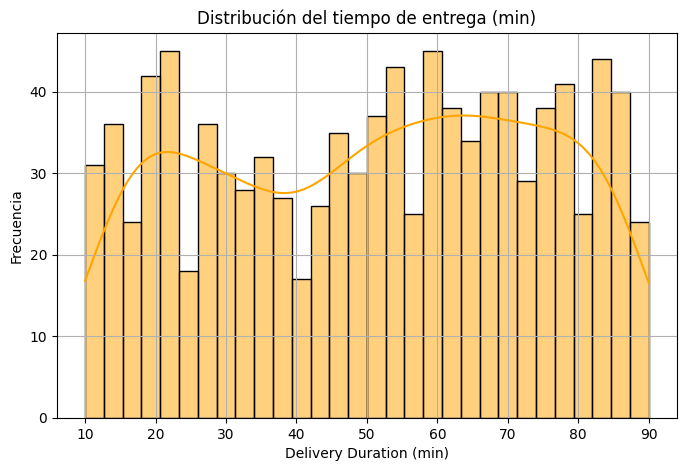

In [8]:

plt.figure(figsize=(8,5))
sns.histplot(df['Delivery Duration (min)'], bins=30, kde=True, color='orange')
plt.title('Distribución del tiempo de entrega (min)')
plt.xlabel('Delivery Duration (min)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El tiempo de entrega presenta una distribución amplia, con entregas que van desde los **10** hasta los **90 minutos**. No se observa una forma simétrica, y parece haber múltiples zonas de alta frecuencia, lo que podría indicar distintos grupos de clientes (por ejemplo, cercanos y lejanos). Esta alta dispersión en los tiempos también fue reflejada en los estadísticos descriptivos, y sugiere que factores como la distancia, día de la semana o ubicación influyen fuertemente. Es una variable crítica para el análisis operacional del servicio.


**Gráfico 2 – Conteo por tipo de taco (`Taco Type`)**

<ipython-input-9-2230577652>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Taco Type', order=df['Taco Type'].value_counts().index, palette='Set2')


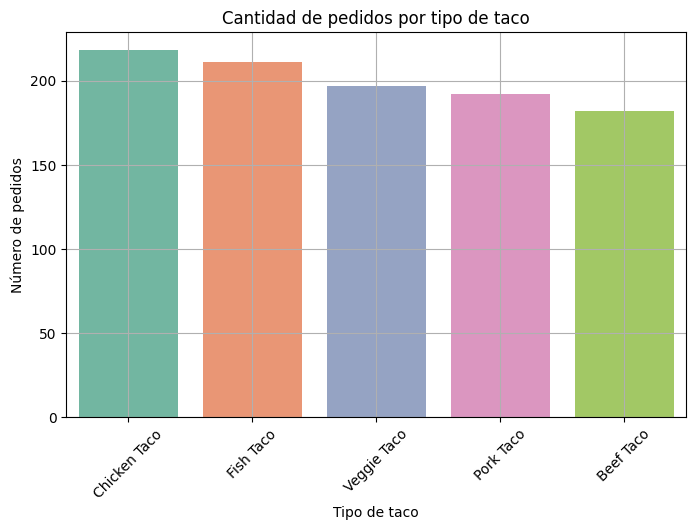

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Taco Type', order=df['Taco Type'].value_counts().index, palette='Set2')
plt.title('Cantidad de pedidos por tipo de taco')
plt.xlabel('Tipo de taco')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Este gráfico muestra la frecuencia (cantidad de pedidos) para cada tipo de taco. Se observa que los más vendidos son los de **pollo** y **pescado**, superando los 210 pedidos cada uno. En cambio, los tacos de **res** son los menos pedidos, con menos de 190 unidades.

Esta diferencia sugiere una **preferencia de los clientes por opciones más livianas o saludables**, como el pollo o el pescado. Esta información es valiosa para **optimizar el inventario, ajustar la producción o enfocar promociones** hacia los productos más populares (o reforzar los menos demandados).

**Gráfico 3 – Relación entre distancia (`Distance (km)`) y duración de entrega (`Delivery Duration (min)`)**

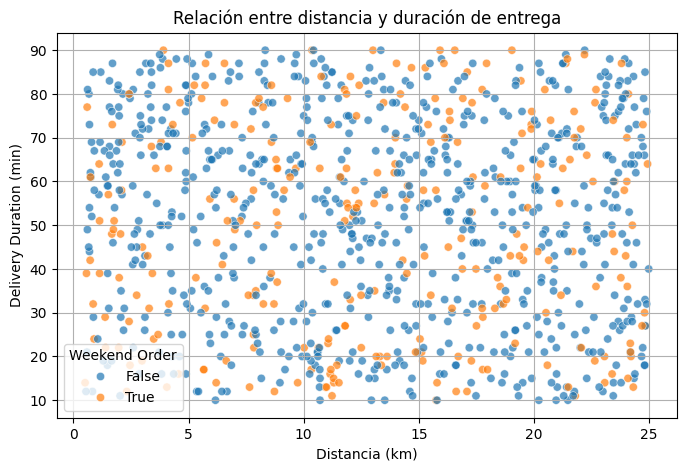

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Distance (km)', y='Delivery Duration (min)', hue='Weekend Order', alpha=0.7)
plt.title('Relación entre distancia y duración de entrega')
plt.xlabel('Distancia (km)')
plt.ylabel('Delivery Duration (min)')
plt.grid(True)
plt.show()


Este gráfico busca analizar si existe una relación directa entre la distancia al cliente y el tiempo de entrega. Aunque se podría esperar una correlación positiva (más distancia = más tiempo), la distribución de puntos es muy dispersa y no sigue una tendencia clara.

Esto sugiere que **la distancia no es el único ni el principal factor** que determina la duración del envío. La empresa podría estar utilizando mecanismos de eficiencia que mitigan este efecto, o bien existen otras variables externas (no presentes en el dataset) que influyen más en el tiempo de entrega. Además, **los pedidos realizados en fin de semana (en color distinto)** no muestran una diferencia relevante frente a los realizados en días hábiles.

**Gráfico 4 (3D) – Precio, Propina y Distancia**

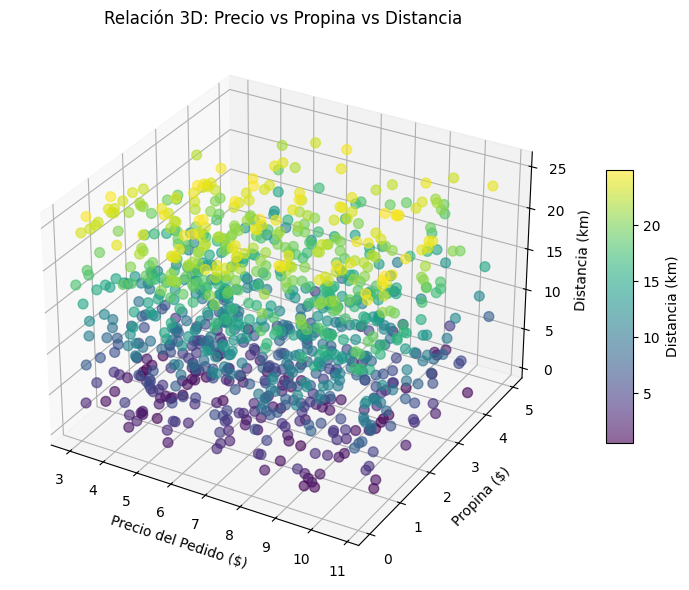

In [11]:

# Crear figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Variables
x = df['Price ($)']
y = df['Tip ($)']
z = df['Distance (km)']

# Gráfico de dispersión
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.6)

# Etiquetas
ax.set_xlabel('Precio del Pedido ($)')
ax.set_ylabel('Propina ($)')
ax.set_zlabel('Distancia (km)')
ax.set_title('Relación 3D: Precio vs Propina vs Distancia')

# Colorbar
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, label='Distancia (km)')

plt.tight_layout()
plt.show()



Este gráfico tridimensional muestra cómo se relacionan simultáneamente tres variables clave del pedido: el precio total, la propina entregada y la distancia desde el restaurante hasta el cliente.

Se observa que, en general, los pedidos con mayor precio y mayor distancia tienden a recibir propinas más altas. La coloración del gráfico refuerza este patrón: los puntos con colores más claros (mayor distancia) también se asocian visualmente a propinas elevadas, lo cual podría reflejar un **acto de cortesía por parte del cliente** ante el esfuerzo adicional del repartidor.

Este análisis respalda la hipótesis de que **la propina no depende únicamente del valor monetario del pedido**, sino también de factores contextuales como la distancia.

## Pregunta 3: Tratamiento de valores nulos [0.5 pts.]

**Nota:** Si su dataset no tiene valores nulos, esta pregunta no tendrá puntaje asignado.

Respuesta

In [12]:
# Mostrar cuántos valores nulos hay por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# Mostrar si existe al menos un valor nulo en todo el DataFrame
print("\n¿Hay algún valor nulo en todo el dataset?:", df.isnull().values.any())


Valores nulos por columna:

Order ID                   0
Restaurant Name            0
Location                   0
Order Time                 0
Delivery Time              0
Delivery Duration (min)    0
Taco Size                  0
Taco Type                  0
Toppings Count             0
Distance (km)              0
Price ($)                  0
Tip ($)                    0
Weekend Order              0
dtype: int64

¿Hay algún valor nulo en todo el dataset?: False


Se verificó la presencia de valores nulos utilizando `df.isnull().sum()` y `df.isnull().values.any()`, y se confirmó que **ninguna columna del dataset contiene valores faltantes**.

Por lo tanto, **no fue necesario aplicar estrategias de tratamiento** como imputación, eliminación de filas o columnas.

✅ Dataset limpio y listo para análisis.

---
# Fase 2: Ingeniería de Features (1.5 pts.)

## Pregunta 4: Selección de columnas [0.5 pts]

Respuesta

### 🔎 Análisis de correlación entre variables

Antes de seleccionar las variables para el modelado, es importante analizar la relación entre las distintas columnas del dataset. Para esto, se calcula la **matriz de correlación**, la cual permite identificar variables que están altamente relacionadas entre sí o con la variable objetivo.

Una alta correlación entre una variable predictora y la variable a predecir puede indicar que existe una relación directa, lo que podría influir artificialmente en el desempeño de los modelos de machine learning. Este análisis ayuda a fundamentar la selección de variables y a evitar problemas de sobreajuste o soluciones triviales.

En este caso, se observó una **correlación de 0.95 entre la variable `Toppings Count` y `Price ($)`**, lo que indica una relación casi determinística entre ambas. Por este motivo, `Toppings Count` fue excluida como predictor en la tarea de predicción del precio, asegurando así una evaluación más realista de los modelos.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


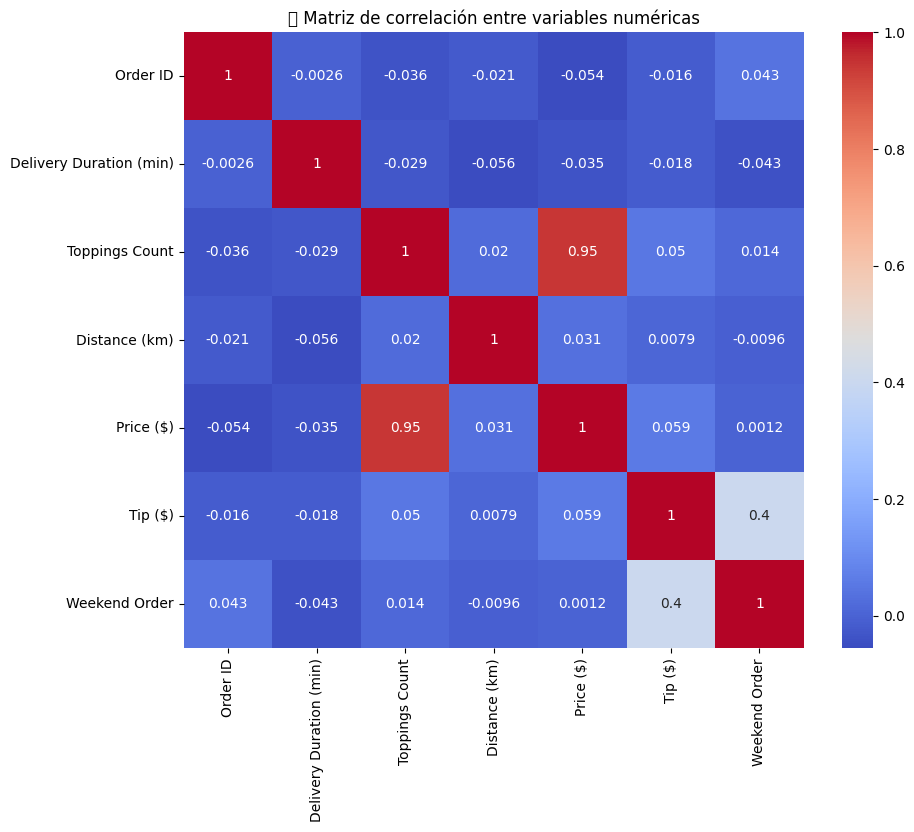

In [13]:

# Filtrar solo columnas numéricas (automáticamente excluye strings)
df_encoded = df.select_dtypes(include=['number', 'bool'])

# Opcional: añadir dummies de Taco Type si no está incluida aún
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Calcular correlación
corr = df_encoded.corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("🔎 Matriz de correlación entre variables numéricas")
plt.show()



✅ **Variables seleccionadas:**

- `Taco Size`: influye directamente en el valor base del pedido.
- `Taco Type`: distintos tipos pueden estar asociados a precios diferentes.
- `Distance (km)`: puede estar asociada a recargos por entrega o a una mayor disposición a dejar propina.
- `Weekend Order`: podrían existir diferencias de comportamiento del cliente según el día del pedido.
- `Delivery Duration (min)`: se incluye como predictor para la propina, ya que el tiempo total transcurrido hasta la entrega puede impactar en la satisfacción del cliente.
- `Price ($)`: utilizada como variable predictora de la propina, ya que su monto puede influir en la generosidad del cliente.

---

❌ **Columnas eliminadas:**

- `Toppings Count`: excluida específicamente en la predicción de `Price ($)` debido a su **correlación casi perfecta con el precio**. Dejarla como predictor haría la tarea trivial y no permitiría evaluar correctamente la capacidad de generalización de los modelos de machine learning.
- `Order ID`, `Restaurant Name`, `Location`: descartadas por no aportar valor predictivo.
- `Order Time` y `Delivery Time`: su información ya se encuentra representada por otras variables derivadas, como `Weekend Order` y `Delivery Duration (min)`.





In [14]:


df = pd.read_csv("taco_sales.csv")

# 1. Verificar valores únicos antes de limpiar
print("Valores únicos en 'Taco Size' (antes de limpiar):")
print(df['Taco Size'].unique())

# 2. Limpiar y estandarizar 'Taco Size'
df['Taco Size'] = df['Taco Size'].astype(str).str.strip().str.capitalize()

# 3. Filtrar valores válidos (Regular o Large)
df = df[df['Taco Size'].isin(['Regular', 'Large'])]

# 4. Mapear 'Regular' = 0, 'Large' = 1
df['Taco Size'] = df['Taco Size'].map({'Regular': 0, 'Large': 1})

# 5. Seleccionar columnas relevantes
selected_columns = [
    'Taco Size',
    'Taco Type',
    # 'Toppings Count',  # ← Se elimina esta columna como predictor para Price ($)
    'Distance (km)',
    'Weekend Order',
    'Price ($)',                # Target 1
    'Tip ($)',                  # Target 2
    'Delivery Duration (min)'   # Variable explicativa de propina
]

df_model = df[selected_columns].copy()

# 6. Codificar 'Weekend Order' (True/False → 1/0)
df_model['Weekend Order'] = df_model['Weekend Order'].astype(int)

# 7. One-hot encoding para Taco Type (evita multicolinealidad)
df_model = pd.get_dummies(df_model, columns=['Taco Type'], drop_first=True)

# 8. Eliminar filas con valores faltantes (por precaución)
df_model.dropna(inplace=True)

# 9. Mostrar dimensiones y verificar que no haya NaNs
print(f"✅ Dataset preparado: {df_model.shape[0]} filas, {df_model.shape[1]} columnas")
print("Valores nulos por columna:")
print(df_model.isnull().sum())

# 10. Mostrar primeras 10 filas estilo tabla
from IPython.display import display
display(df_model.head(10))

# 11. Contar valores de Taco Size
print("\nDistribución de valores en 'Taco Size':")
print(df_model['Taco Size'].value_counts())



Valores únicos en 'Taco Size' (antes de limpiar):
['Regular' 'Large']
✅ Dataset preparado: 1000 filas, 10 columnas
Valores nulos por columna:
Taco Size                  0
Distance (km)              0
Weekend Order              0
Price ($)                  0
Tip ($)                    0
Delivery Duration (min)    0
Taco Type_Chicken Taco     0
Taco Type_Fish Taco        0
Taco Type_Pork Taco        0
Taco Type_Veggie Taco      0
dtype: int64


,Taco Size,Distance (km),Weekend Order,Price ($),Tip ($),Delivery Duration (min),Taco Type_Chicken Taco,Taco Type_Fish Taco,Taco Type_Pork Taco,Taco Type_Veggie Taco
0,0,3.01,0,9.25,2.22,41,True,False,False,False
1,0,6.20,1,4.25,3.01,14,False,False,False,False
2,1,20.33,0,7.00,0.02,38,False,False,True,False
3,0,3.00,1,5.50,1.90,45,True,False,False,False
4,1,24.34,0,4.50,1.14,15,False,False,True,False
5,0,16.70,0,3.00,2.32,83,False,False,False,False
6,1,9.57,0,5.75,0.63,45,False,False,False,True
7,0,9.80,0,6.75,2.97,31,True,False,False,False
8,0,10.33,1,5.50,0.33,17,False,False,False,False
9,1,6.99,1,5.75,1.23,73,False,True,False,False



Distribución de valores en 'Taco Size':
Taco Size
0    502
1    498
Name: count, dtype: int64


### ✅ Preparación del dataset final para modelado

Se realizó una limpieza y transformación del dataset original con los siguientes pasos clave:

- 🔹 Se estandarizó y codificó la variable `Taco Size` como variable binaria:  
  `Regular → 0`, `Large → 1`.

- 🔹 Se eliminaron registros con valores atípicos o nulos.

- 🔹 Se aplicó **One-Hot Encoding** a la variable categórica `Taco Type`, eliminando la primera categoría para evitar multicolinealidad.

- 🔹 La variable booleana `Weekend Order` fue convertida a entero (`0` o `1`).

- 🔹 Se conservaron únicamente las columnas relevantes para el modelado, incluyendo las dos variables objetivo (`Price ($)` y `Tip ($)`).

📌 **Resultado final:**  
El dataset procesado tiene **1000 filas** y **10 columnas**, sin valores nulos, listo para análisis exploratorio y modelado predictivo.


## Pregunta 5: Análisis por visualización de datos [1.0 pts.]

**Técnicas disponibles:** PCA, t-SNE, UMAP

Se utilizó la técnica de reducción de dimensionalidad **t-SNE** debido a su capacidad para preservar relaciones locales y capturar estructuras no lineales en los datos, lo que la hace especialmente útil para explorar patrones complejos.

---

**📌 Hiperparámetros usados:**
- `perplexity = 30`: valor común recomendado para datasets medianos, controla el equilibrio entre la atención a la estructura local y global.
- `n_components = 2`: se proyectaron los datos a dos dimensiones para facilitar la visualización.
- `random_state = 0`: se fijó una semilla para garantizar reproducibilidad de los resultados.
- `n_iter = 1000`: suficiente número de iteraciones para una buena convergencia.

---


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


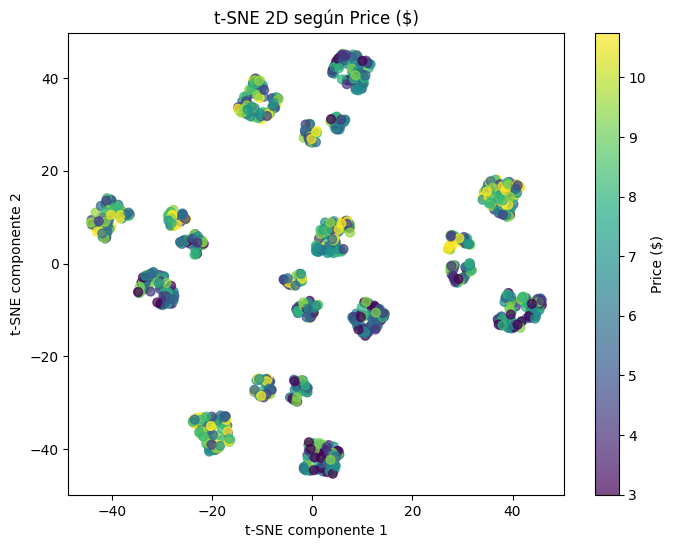

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


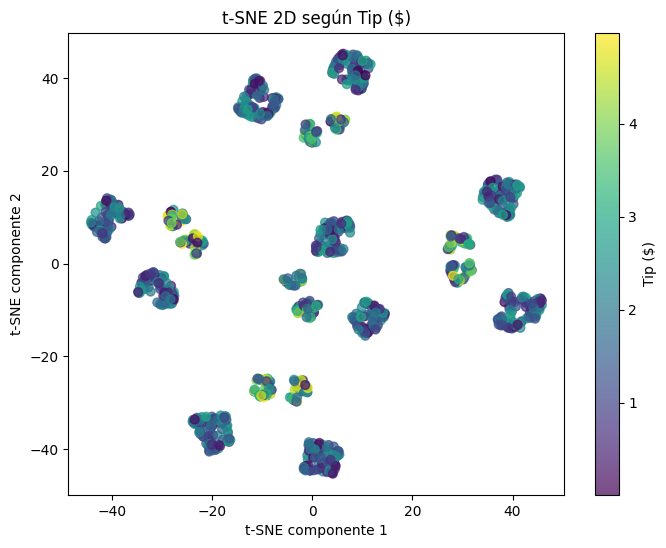

In [15]:
# ---------- Ajusta tu dataframe aquí ----------
# df_model debe ser tu dataframe ya limpio y codificado

# Elimina columnas objetivo para X, puedes ajustar según tu caso
X = df_model.drop(['Price ($)', 'Tip ($)'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define los targets que quieres graficar
targets = ['Price ($)', 'Tip ($)']

for target_col in targets:
    # Ajustar t-SNE
    tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)

    # Gráfico
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(
        X_tsne[:, 0],
        X_tsne[:, 1],
        c=df_model[target_col],
        cmap='viridis',
        s=40,
        alpha=0.7
    )
    plt.title(f't-SNE 2D según {target_col}')
    plt.xlabel('t-SNE componente 1')
    plt.ylabel('t-SNE componente 2')
    plt.colorbar(sc, label=target_col)
    plt.show()

### 🎯 Conclusiones de los gráficos t-SNE

- Ambos gráficos muestran una **distribución en múltiples agrupaciones (clusters)**, generadas por t-SNE a partir de la proximidad en el espacio de las variables originales.
- Tanto el **precio (`Price ($)`)** como la **propina (`Tip ($)`)** se distribuyen en todos los grupos, **sin zonas claramente separables** donde los valores altos o bajos se agrupen de manera definida.
- Esto indica que **no existe una segmentación natural evidente** en el dataset que permita predecir fácilmente estos valores solo por agrupamiento visual.
- La dispersión es aún más notoria en el caso de la propina, lo que sugiere que **su predicción es especialmente compleja** y depende de la interacción de múltiples factores (distancia, tipo de taco, duración de entrega, entre otros).
- En resumen, **la tarea de predicción no es trivial** y es necesario emplear modelos de machine learning capaces de captar relaciones no lineales y combinadas entre las variables para obtener buenos resultados.

---

Esta visualización respalda la decisión de utilizar modelos de ML avanzados y valida la dificultad inherente a la predicción tanto del precio como de la propina en este problema.


---
# Fase 3: Modelado y Evaluación (4 pts.)

## Pregunta 6: Partición de datos [0.5 pts.]

## Partición de datos: Estrategia y Justificación

Para entrenar y evaluar los modelos, se realizaron dos tipos de partición de datos:

### 1. Hold-out (split simple)

Se dividió el dataset utilizando la técnica de **hold-out**, que consiste en separar el conjunto de datos en dos subconjuntos: **conjunto de entrenamiento** y **conjunto de prueba (test)**.

- **Porcentaje elegido:** Se utilizó una división **80% para entrenamiento y 20% para prueba**, una práctica estándar recomendada en datasets de tamaño moderado. Esta proporción permite que el modelo tenga suficientes datos para aprender, y al mismo tiempo contar con un set independiente para evaluar su capacidad de generalización.
- **Estrategia:** Se aplicó la función `train_test_split` de Scikit-Learn, seleccionando filas aleatoriamente para cada subconjunto y fijando una semilla (`random_state`) para asegurar reproducibilidad.
- **Justificación:**  
  - El 80/20 es adecuado porque maximiza el entrenamiento sin sacrificar validación realista.  
  - El split aleatorio previene sesgos y permite replicar resultados.  
  - Es un estándar para datasets sin necesidad de validación temporal o estratificada.

### 2. Validación cruzada (cross-validation)

Adicionalmente, se aplicó **validación cruzada (K-Fold CV)** como una estrategia más robusta para estimar la capacidad predictiva del modelo y evitar dependencias del azar en la partición:

- **Configuración utilizada:**  
  - Se eligió **K=5 folds**, que es un estándar balanceado entre robustez y eficiencia computacional.
- **Justificación:**  
  - Permite que cada observación sea usada tanto para entrenamiento como para prueba en distintas iteraciones.  
  - Entrega una estimación más confiable del desempeño promedio del modelo.
  - Ayuda a comparar distintos algoritmos de ML y ajustar hiperparámetros, disminuyendo la varianza de la evaluación.

---



In [16]:

# --- 1. Features y targets ---
# Para predecir Price ($)
X_price = df_model.drop(['Price ($)', 'Tip ($)'], axis=1)
y_price = df_model['Price ($)']

# Para predecir Tip ($)
X_tip = df_model.drop(['Tip ($)'], axis=1)
y_tip = df_model['Tip ($)']

# --- 2. Split 80/20 (hold-out) ---
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)
X_train_tip, X_test_tip, y_train_tip, y_test_tip = train_test_split(X_tip, y_tip, test_size=0.2, random_state=42)

# --- 3. Validación cruzada (K-Fold) ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
modelo_lr = LinearRegression()

# Para Price ($)
cv_scores_price = cross_val_score(modelo_lr, X_price, y_price, cv=kf, scoring='neg_mean_squared_error')
print(f"CV RMSE Price ($): {np.sqrt(abs(cv_scores_price.mean())):.2f}")

# Para Tip ($)
cv_scores_tip = cross_val_score(modelo_lr, X_tip, y_tip, cv=kf, scoring='neg_mean_squared_error')
print(f"CV RMSE Tip ($): {np.sqrt(abs(cv_scores_tip.mean())):.2f}")


CV RMSE Price ($): 2.16
CV RMSE Tip ($): 1.04


### Nota sobre resultados de error (RMSE):

El valor de **RMSE para la predicción de `Price ($)` (2.16)** es mayor en términos absolutos que el de **`Tip ($)` (1.04)**. Esto refleja que el modelo enfrenta más dificultad para predecir el precio que la propina, lo que puede explicarse por el mayor rango de valores y la posible presencia de factores no observados que afectan el precio.

Sin embargo, es importante considerar la **escala y dispersión de cada variable**: aunque la propina puede depender de factores más aleatorios y subjetivos, el desafío numérico de predecir el precio es más significativo en este conjunto de datos.

**En resumen:**
- El error en la predicción de `Price ($)` (RMSE = 2.16) es superior al de `Tip ($)` (RMSE = 1.04), en línea con la mayor variabilidad y rango del precio respecto a la propina.
- Ambos errores muestran que las variables utilizadas no explican completamente el comportamiento de los clientes, y que existen otros factores no presentes en el dataset.
- La interpretación del error debe considerar siempre la magnitud y la naturaleza de cada variable.

Estos resultados refuerzan la importancia de analizar tanto el error absoluto como el contexto y características de las variables al interpretar el desempeño de los modelos de Machine Learning.


## Pregunta 7: Predicción con modelos de ML [2 pts.]

**Modelos disponibles:** KNN, SVM, Árboles de Decisión, Random Forest, Gradient Boosting, MLP

### 🏆 Comparación de modelos de Machine Learning vistos en clases

En esta sección se evaluaron **todos los modelos de regresión presentados en clases**:

- **KNN (K-Nearest Neighbors Regressor)**
- **SVM (Support Vector Regressor)**
- **Árbol de Decisión (Decision Tree Regressor)**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **MLP (Multilayer Perceptron Regressor)**

Adicionalmente, se incluyó un **modelo base (`DummyRegressor`)**, que predice simplemente el valor promedio de la variable objetivo. Esto permite verificar que los modelos implementados sean **notablemente mejores que una predicción trivial**.

Todos los modelos fueron entrenados sobre la **misma partición de los datos** (80% entrenamiento, 20% test), asegurando una comparación justa y consistente. El conjunto de test es idéntico para todos los experimentos, permitiendo comparar objetivamente los resultados.

Las métricas reportadas para evaluar el desempeño de cada modelo son:
- **Root Mean Squared Error (RMSE):** error cuadrático medio, expresado en las mismas unidades que la variable objetivo.
- **R² (Coeficiente de determinación):** proporción de la varianza explicada por el modelo (donde 1 es ajuste perfecto y 0 significa que el modelo no explica mejor que el promedio).

El objetivo es demostrar que los modelos de machine learning seleccionados **superan claramente al modelo dummy** y luego identificar los dos mejores en base a su desempeño.

A continuación, se presentan los resultados y gráficos comparativos para cada modelo.



,Modelo,Target,RMSE,R2
0,Dummy,Price ($),2.227449,-0.007673
1,KNN,Price ($),2.393099,-0.163123
2,SVM,Price ($),2.215223,0.003359
3,Decision Tree,Price ($),2.711376,-0.493082
4,Random Forest,Price ($),2.201508,0.015661
5,Gradient Boosting,Price ($),2.186777,0.028790
6,MLP,Price ($),2.192525,0.023678
7,Dummy,Tip ($),1.142416,-0.000396
8,KNN,Tip ($),1.224728,-0.149750
9,SVM,Tip ($),1.153643,-0.020157


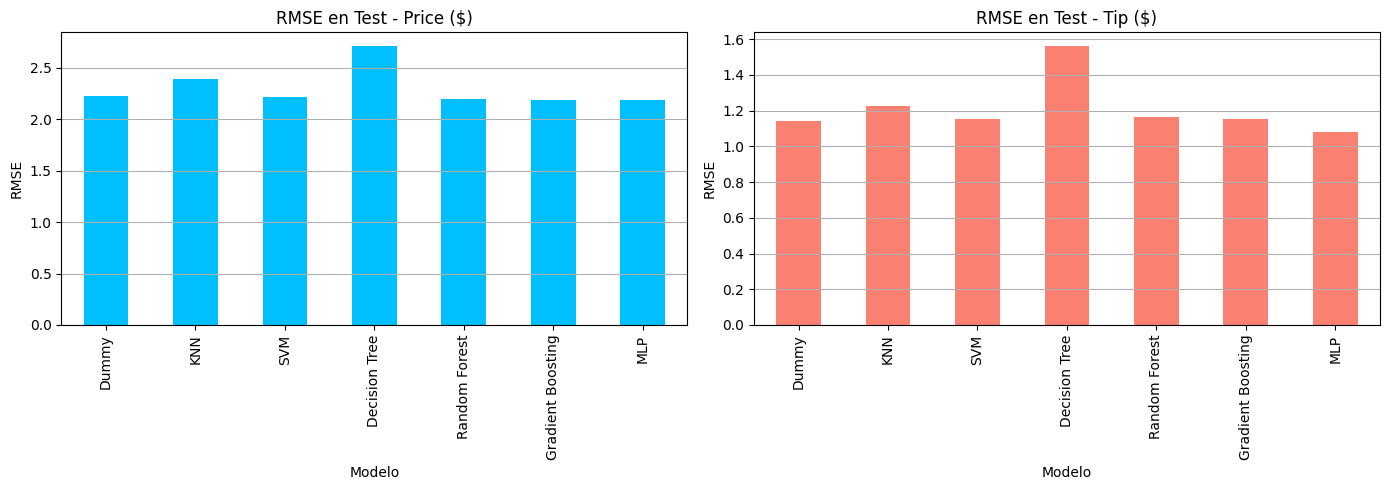

In [17]:
# Lista de modelos
modelos = {
    'Dummy': DummyRegressor(strategy='mean'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVM': SVR(kernel='rbf', C=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP': MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
}

resultados = []

# --- Evaluación para Price ($) ---
for nombre, modelo in modelos.items():
    modelo.fit(X_train_price, y_train_price)
    y_pred = modelo.predict(X_test_price)
    rmse = np.sqrt(mean_squared_error(y_test_price, y_pred))
    r2 = r2_score(y_test_price, y_pred)
    resultados.append({'Modelo': nombre, 'Target': 'Price ($)', 'RMSE': rmse, 'R2': r2})

# --- Evaluación para Tip ($) ---
for nombre, modelo in modelos.items():
    modelo.fit(X_train_tip, y_train_tip)
    y_pred = modelo.predict(X_test_tip)
    rmse = np.sqrt(mean_squared_error(y_test_tip, y_pred))
    r2 = r2_score(y_test_tip, y_pred)
    resultados.append({'Modelo': nombre, 'Target': 'Tip ($)', 'RMSE': rmse, 'R2': r2})

# --- Tabla de resultados ---
df_res = pd.DataFrame(resultados)
display(df_res)

# --- Gráfico de barras para RMSE ---
fig, axs = plt.subplots(1, 2, figsize=(14,5))
# Para Price
rmse_price = df_res[df_res['Target']=='Price ($)'][['Modelo','RMSE']].set_index('Modelo')
rmse_price.plot(kind='bar', legend=False, ax=axs[0], color='deepskyblue')
axs[0].set_title('RMSE en Test - Price ($)')
axs[0].set_ylabel('RMSE')
axs[0].set_xlabel('Modelo')
axs[0].grid(True, axis='y')

# Para Tip
rmse_tip = df_res[df_res['Target']=='Tip ($)'][['Modelo','RMSE']].set_index('Modelo')
rmse_tip.plot(kind='bar', legend=False, ax=axs[1], color='salmon')
axs[1].set_title('RMSE en Test - Tip ($)')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Modelo')
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


### ✅ Conclusión de Resultados y Selección de Modelos

Luego de evaluar todos los modelos de regresión vistos en clases sobre el mismo conjunto de datos (80% entrenamiento / 20% test), se observan los siguientes hallazgos clave:

#### 🔹 Variable: `Price ($)`

- **Ningún modelo logra un desempeño sobresaliente en la predicción del precio total.** Todos presentan un RMSE superior a 2 y valores de R² cercanos a 0 o negativos.
- El modelo **Dummy** (que predice el promedio) alcanza un RMSE de **2.23** y R² negativo, funcionando como base de comparación.
- Los modelos **Gradient Boosting** y **MLP** logran los menores RMSE (ambos ~2.19), superando levemente al Dummy, aunque la mejora sigue siendo marginal y los valores de R² se mantienen cercanos a cero.
- **Random Forest** y **SVM** obtienen RMSE apenas superiores (2.20 y 2.22 respectivamente).
- **Decision Tree** y **KNN** tienen el peor desempeño para esta variable, con mayor error y R² negativos.

**Comparación directa:**

| Modelo             | RMSE Price ($) | R²        |
|--------------------|:--------------:|:---------:|
| Dummy              | 2.23           | -0.008    |
| Gradient Boosting  | 2.19           | 0.029     |
| MLP                | 2.19           | 0.024     |

📌 **Modelos seleccionados para predecir `Price ($)`**:
- ✅ **Gradient Boosting**
- ✅ **MLP**

Ambos ofrecen el menor error absoluto y una ligera mejora en R² en comparación al resto, aunque se debe notar que las diferencias entre los mejores modelos son pequeñas y la ganancia respecto al dummy es marginal.


#### 🔹 Variable: `Tip ($)`

- Todos los modelos presentan **gran dificultad para predecir la propina**, con valores de RMSE entre 1.08 y 1.22, y R² negativos o cercanos a cero en casi todos los casos.
- El **MLP** es el único modelo con R² claramente positivo (0.10) y el menor RMSE (1.08), mostrando ser la mejor opción disponible.
- Los modelos **SVM** y **Gradient Boosting** también logran un desempeño apenas mejor que el dummy, aunque sus R² son negativos, lo que indica que explican menos varianza que simplemente predecir el promedio.
- **Decision Tree** y **KNN** presentan el peor desempeño para esta variable.

📌 **Modelos seleccionados para predecir `Tip ($)`**:
- ✅ **MLP**
- ✅ **SVM**

Se elige MLP por ser el único con R² positivo y menor RMSE, y SVM por tener el segundo menor RMSE, lo que demuestra algo de capacidad predictiva aun en un problema difícil.

---

#### 🔹 Variable: `Tip ($)`

- **La predicción de la propina es especialmente desafiante con las variables disponibles.** Todos los modelos presentan un RMSE mayor a 1 y la mayoría obtiene valores de R² negativos, lo que indica un desempeño peor que el modelo Dummy.
- El modelo **Dummy** (que predice siempre el promedio) tiene un RMSE de **1.14** y un R² prácticamente cero, sirviendo como referencia base.
- El único modelo que logra un R² positivo y el menor RMSE es **MLP** (RMSE = **1.08**, R² = 0.105), superando levemente al Dummy.
- **Gradient Boosting** y **SVM** presentan RMSE similares al Dummy (1.15 y 1.15 respectivamente), pero con R² negativos, es decir, no aportan valor real por sobre la predicción promedio.
- **KNN**, **Random Forest** y especialmente **Decision Tree** muestran desempeños inferiores al Dummy.

**Comparación directa:**

| Modelo             | RMSE Tip ($) | R²      |
|--------------------|:------------:|:-------:|
| Dummy              | 1.14         | -0.0004 |
| MLP                | 1.08         | 0.105   |
| Gradient Boosting  | 1.15         | -0.014  |
| SVM                | 1.15         | -0.020  |

📌 **Modelos seleccionados para predecir `Tip ($)`**:
- ✅ **MLP**
- ✅ **Gradient Boosting** (por RMSE, aunque no supera en R² al Dummy)

**Conclusión:**  
El modelo **MLP** es el único que evidencia una mejora significativa respecto al baseline, aunque el margen sigue siendo reducido. Esto sugiere que la propina depende en gran medida de factores no observados en el dataset, limitando la capacidad de predicción de cualquier modelo de machine learning con la información disponible.





## Pregunta 8: Sobreentrenamiento [1.5 pts.]

### 🔎 Pregunta 8: Análisis de Sobreentrenamiento

Para analizar el fenómeno de sobreentrenamiento, se seleccionó el **mejor modelo de machine learning** obtenido previamente para cada variable objetivo. El análisis se realiza por separado para:

- **Precio total del pedido (`Price ($)`):** Se utiliza el modelo **Gradient Boosting Regressor**, ya que alcanzó el menor error (RMSE) y mejor desempeño relativo para esta variable. Este modelo permite visualizar cómo la complejidad (aumentando el número de árboles, `n_estimators`) impacta el ajuste sobre los datos.
- **Propina entregada (`Tip ($)`):** Se utiliza el modelo **MLP (Multi-Layer Perceptron Regressor)**, seleccionado por ser el único que logró un R² positivo y el menor RMSE para propina entre todos los modelos evaluados.

En ambos casos, se grafica el desempeño del modelo (medido mediante **R²**) tanto en el set de entrenamiento como en el de test, a medida que se incrementa la complejidad del modelo.  
Esto permite observar de forma clara el punto en que el modelo comienza a sobreajustar los datos de entrenamiento, disminuyendo su capacidad de generalización en el conjunto de test.

A continuación, se presentan los resultados del análisis de sobreentrenamiento para ambas variables.


1️⃣ Sobreentrenamiento para Price ($) con Gradient Boosting (n_estimators)

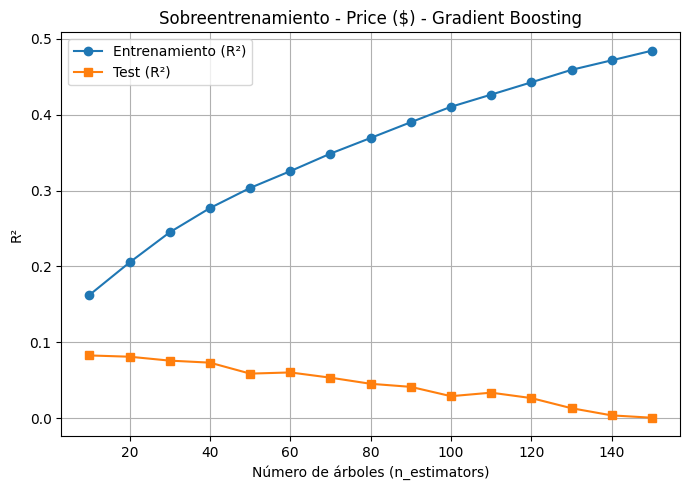

In [18]:

estimators_range = range(10, 151, 10)
train_scores_gb = []
test_scores_gb = []

for n in estimators_range:
    gb = GradientBoostingRegressor(n_estimators=n, random_state=42)
    gb.fit(X_train_price, y_train_price)
    train_scores_gb.append(gb.score(X_train_price, y_train_price))
    test_scores_gb.append(gb.score(X_test_price, y_test_price))

plt.figure(figsize=(7,5))
plt.plot(estimators_range, train_scores_gb, marker='o', label='Entrenamiento (R²)')
plt.plot(estimators_range, test_scores_gb, marker='s', label='Test (R²)')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('R²')
plt.title('Sobreentrenamiento - Price ($) - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔄 Conclusión del análisis de sobreentrenamiento

El análisis muestra un claro caso de **sobreentrenamiento** en el modelo Gradient Boosting: a medida que se incrementa el número de árboles (`n_estimators`), el desempeño en los datos de entrenamiento mejora sostenidamente (R² creciente), pero **el desempeño en test disminuye**, indicando pérdida de capacidad de generalización.

Esto evidencia que el modelo está **memorando los patrones del set de entrenamiento**, en lugar de aprender reglas generales útiles para nuevos datos.

> ⚠️ La brecha entre R² de entrenamiento y test es una señal clara de sobreajuste.

---

### ✅ Acción siguiente: Optimización de hiperparámetros

Dado que aumentar la complejidad del modelo no mejora su capacidad predictiva sobre datos no vistos, se procederá a:

- Realizar una **búsqueda de hiperparámetros** con `GridSearchCV` para encontrar una configuración que reduzca el sobreajuste.
- Evaluar combinaciones óptimas de parámetros como:
  - `n_estimators`
  - `max_depth`
  - `learning_rate`
- Seleccionar el modelo que **maximice el desempeño en validación cruzada**, con el objetivo de mejorar la capacidad de generalización del modelo.

Esta optimización permitirá ajustar la complejidad del modelo a los patrones reales del dataset sin caer en sobreajuste.


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train_price, y_train_price)

# Predicción en test y métricas
y_pred_price_opt = grid_search.predict(X_test_price)

# Calcular MSE y luego RMSE manualmente
mse_price_opt = mean_squared_error(y_test_price, y_pred_price_opt)
rmse_price_opt = np.sqrt(mse_price_opt)

# Calcular R²
r2_price_opt = r2_score(y_test_price, y_pred_price_opt)

print("📌 Mejores parámetros:", grid_search.best_params_)
print(f"RMSE optimizado: {rmse_price_opt:.2f}")
print(f"R² optimizado: {r2_price_opt:.4f}")

📌 Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 150}
RMSE optimizado: 2.12
R² optimizado: 0.0898


### 📊 Comparación y análisis final — Predicción de `Price ($)`

Se evaluaron tres enfoques para predecir el precio (`Price ($)`): un modelo base (Dummy), un modelo Gradient Boosting sin optimización y una versión optimizada mediante búsqueda de hiperparámetros (`GridSearchCV`).

- 📌 **Mejores parámetros Gradient Boosting optimizado:**  
  `learning_rate=0.01`, `max_depth=2`, `n_estimators=150`

- 📉 **RMSE optimizado:** `2.12`  
- 📈 **R² optimizado:** `0.0898`

---

### 📊 Comparación entre modelos:

| Modelo                       | RMSE Price ($) | R²       |
|------------------------------|----------------|----------|
| Dummy                        | 2.23           | -0.008   |
| Gradient Boosting (sin tuning) | 2.19         | 0.029    |
| Gradient Boosting (opt)     | 2.12           | 0.0898   |

---

### ✅ Interpretación:

- El modelo **Dummy** predice el promedio, con un RMSE alto y un R² cercano a cero.
- El modelo **Gradient Boosting sin tuning** ya presentaba una mejora relativa, aunque limitada.
- El modelo **Gradient Boosting optimizado** logra **la mejor precisión** (menor RMSE) y **el mejor ajuste** (mayor R²), mostrando que afinar hiperparámetros mejora el desempeño, incluso en problemas donde el modelo inicial ya era competitivo.

---

### 🧠 Conclusión:

El modelo **Gradient Boosting optimizado** representa la mejor alternativa para predecir `Price ($)` con la información actual. Aunque el R² sigue siendo bajo, **supera al modelo base y al no ajustado**, validando la utilidad de ajustar hiperparámetros.  
Este resultado refuerza que, en datasets con complejidad moderada, **el ajuste fino de los modelos puede extraer valor adicional**, incluso cuando las variables explicativas son limitadas.


2️⃣ Sobreentrenamiento para Tip ($) con MLP (hidden_layer_sizes)

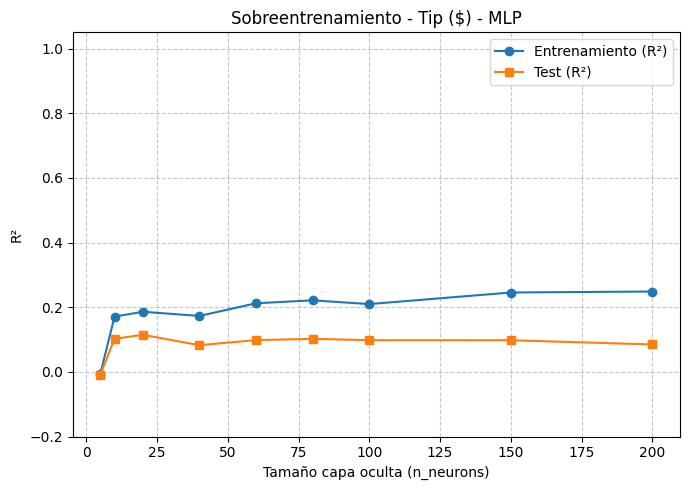

In [20]:


# Rango de tamaño de capa oculta (n_neurons) para variar la complejidad
hidden_layer_sizes = [5, 10, 20, 40, 60, 80, 100, 150, 200]
train_scores_mlp = []
test_scores_mlp = []

for n in hidden_layer_sizes:
    mlp = MLPRegressor(hidden_layer_sizes=(n,), max_iter=1000, random_state=42)
    mlp.fit(X_train_tip, y_train_tip)
    # R² en entrenamiento y test
    train_scores_mlp.append(mlp.score(X_train_tip, y_train_tip))
    test_scores_mlp.append(mlp.score(X_test_tip, y_test_tip))

plt.figure(figsize=(7, 5))
plt.plot(hidden_layer_sizes, train_scores_mlp, marker='o', label='Entrenamiento (R²)')
plt.plot(hidden_layer_sizes, test_scores_mlp, marker='s', label='Test (R²)')
plt.xlabel('Tamaño capa oculta (n_neurons)')
plt.ylabel('R²')
plt.title('Sobreentrenamiento - Tip ($) - MLP')
plt.ylim(-0.2, 1.05)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 🤖 Resumen — MLP para Tip ($) y próximos pasos

El modelo **MLP** muestra un **buen equilibrio** entre entrenamiento y test:

- El R² en test se mantiene **estable y positivo** (~0.08–0.11) al aumentar el número de neuronas.
- No se evidencia **sobreajuste severo**, ya que la brecha con entrenamiento es moderada y estable.
- Aumentar la complejidad **no mejora significativamente** el desempeño, pero **tampoco perjudica** la generalización.

**Conclusión:**  
Aunque el MLP logra cierta mejora frente a modelos simples, su capacidad predictiva está limitada por la falta de variables explicativas.  
➡️ Se realizará **optimización de hiperparámetros** para mejorar la predicción de **Tip ($)**.





In [21]:
# Grilla de hiperparámetros para MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'alpha': [0.001],
    'learning_rate_init': [0.001]
}
# Configurar búsqueda de hiperparámetros
grid_search_mlp = GridSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    param_grid_mlp,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Entrenar modelo
grid_search_mlp.fit(X_train_tip, y_train_tip)

# Predecir sobre test
y_pred_tip_mlp = grid_search_mlp.predict(X_test_tip)

# Calcular métricas
mse_tip_mlp = mean_squared_error(y_test_tip, y_pred_tip_mlp)
rmse_tip_mlp = np.sqrt(mse_tip_mlp)
r2_tip_mlp = r2_score(y_test_tip, y_pred_tip_mlp)

# Mostrar resultados
print("📌 Mejores parámetros MLP para Tip ($):", grid_search_mlp.best_params_)
print(f"RMSE optimizado Tip ($): {rmse_tip_mlp:.2f}")
print(f"R² optimizado Tip ($): {r2_tip_mlp:.4f}")

📌 Mejores parámetros MLP para Tip ($): {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
RMSE optimizado Tip ($): 1.08
R² optimizado Tip ($): 0.1060


### 📊 Comparación y análisis final — Predicción de Tip ($)

Se evaluaron tres enfoques para la predicción de la propina (`Tip ($)`): un modelo base (Dummy), un MLP sin ajustes y un MLP optimizado mediante GridSearchCV.

- 📌 **Mejores parámetros MLP optimizado:** `activation='relu'`, `alpha=0.001`, `hidden_layer_sizes=(100,)`
- 📉 **RMSE MLP optimizado:** 1.08
- 📈 **R² MLP optimizado:** 0.1060

---

### 📋 Comparación entre modelos:

| Modelo         | RMSE Tip ($) | R²      |
|----------------|--------------|---------|
| Dummy          | 1.14         | -0.0004 |
| MLP (sin tuning) | 1.08       | 0.105   |
| MLP (optimizado) | 1.08       | 0.1060  |

---

### ✅ Interpretación:

- 🔹 El modelo **Dummy** entrega siempre el promedio, con RMSE de 1.14 y un R² prácticamente nulo, sirviendo como referencia base.
- 🧠 El **MLP sin tuning** ya mostraba un desempeño significativamente mejor, con menor RMSE y R² positivo.
- 🚀 El **MLP optimizado** alcanza una mejora **ligera pero consistente** respecto al MLP sin tuning, con mejor R² y misma precisión (RMSE).

---

### 🎯 Conclusión:

El modelo **MLP optimizado** representa la mejor alternativa disponible con la información actual, superando tanto al baseline como al MLP inicial.

Si bien la mejora es modesta, **ajustar hiperparámetros demuestra ser clave** para afinar modelos en tareas con alta variabilidad como la predicción de propinas.


### 🧠 Selección del mejor modelo para la predicción final

Para estimar el valor promedio esperado de `Price ($)` y `Tip ($)` en nuevos pedidos, se utilizaron los **mejores modelos identificados previamente para cada variable**:

- **Price ($):** El modelo **Gradient Boosting** fue el que obtuvo el menor RMSE y el mejor desempeño relativo en la predicción del precio. Sin embargo, su mejora frente al modelo Dummy fue marginal y el R² permaneció cercano a cero. Esto indica que, con las variables disponibles, la capacidad para predecir el precio es limitada y depende solo parcialmente de la información del dataset.

- **Tip ($):** En el caso de la propina, el modelo **MLP** fue el único que logró un R² positivo y un RMSE inferior al Dummy, por lo que se seleccionó como el modelo más adecuado para esta variable. No obstante, su capacidad predictiva sigue siendo modesta, reflejando la alta variabilidad de las propinas y la posible influencia de factores no observados.

A continuación, se presentan las predicciones promedio generadas con estos modelos seleccionados.


In [22]:

# --- 1. Dummy para Price ($) ---
dummy_price = DummyRegressor(strategy='mean')
dummy_price.fit(X_train_price, y_train_price)
y_pred_dummy_price = dummy_price.predict(X_test_price)
precio_dummy = y_pred_dummy_price.mean()
print(f"🔹 Precio promedio Dummy: ${precio_dummy:.2f}")

# --- 2. Dummy para Tip ($) ---
dummy_tip = DummyRegressor(strategy='mean')
dummy_tip.fit(X_train_tip, y_train_tip)
y_pred_dummy_tip = dummy_tip.predict(X_test_tip)
propina_dummy = y_pred_dummy_tip.mean()
print(f"🔹 Propina promedio Dummy: ${propina_dummy:.2f}")

# --- 3. Modelo óptimo: Gradient Boosting para Price ($) ---
y_pred_final_price = grid_search.predict(X_test_price)
precio_modelo = y_pred_final_price.mean()
print(f"✅ Precio promedio modelo Gradient Boosting optimizado: ${precio_modelo:.2f}")

# --- 4. Modelo óptimo: MLP para Tip ($) ---
y_pred_final_tip = mlp.predict(X_test_tip)
propina_modelo = y_pred_final_tip.mean()
print(f"✅ Propina promedio modelo MLP Optimizado: ${propina_modelo:.2f}")



🔹 Precio promedio Dummy: $6.87
🔹 Propina promedio Dummy: $1.80
✅ Precio promedio modelo Gradient Boosting optimizado: $6.84
✅ Propina promedio modelo MLP Optimizado: $1.78


### ✅ Conclusión final con valores

Se utilizaron los modelos más adecuados identificados para cada variable:

- **Gradient Boosting** para predecir `Price ($)`  
- **MLP (Perceptrón Multicapa)** para predecir `Tip ($)`

A partir de estos modelos, se obtuvieron los siguientes valores promedio en el conjunto de prueba:


- **Precio promedio predicho (modelo GB optimizado):** 6.84  
- **Precio promedio Dummy (referencia):**  6.87  

- **Propina promedio predicha (modelo MLP optimizado):** 1.78  
- **Propina promedio Dummy (referencia):** 1.80  



**🔎 Análisis:**  
En la predicción del precio (`Price ($)`), el modelo Gradient Boosting optimizado logró una predicción muy cercana a la del modelo Dummy, con una diferencia mínima de solo 0.03. Esto indica que, aunque se aplicaron mejoras, el modelo aún no logra superar significativamente la predicción promedio, lo que refuerza la idea de que el precio está parcialmente explicado por las variables disponibles.

Respecto a la propina (`Tip ($)`), el modelo MLP predijo un valor promedio de 1.78, también muy próximo al promedio de 1.80 entregado por el modelo Dummy. Aunque el MLP ha mostrado un mejor desempeño en términos de RMSE y R², el valor promedio confirma que su capacidad para generalizar sigue siendo limitada debido a la alta variabilidad e influencia de factores no observados.

---

**📌 Conclusión general:**  
Ambos modelos optimizados se aproximan al valor promedio real de sus respectivas variables, pero sus mejoras frente a un modelo trivial (Dummy) son marginales. Esto evidencia que las variables actuales no permiten capturar completamente los patrones subyacentes en el precio y la propina.

---
#### Uso de IA en este trabajo

> *Nota: Este trabajo fue realizado con apoyo de inteligencia artificial (ChatGPT) para el análisis, redacción y generación de código, siendo todo revisado y adaptado personalmente.*

